In [1]:
from textblob import TextBlob

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
#read data from file

data = pd.read_csv('/home/devops/Documents/Practice-Python/shakespear data - analysis/Shakespeare_data.csv')

In [8]:
# constructing a new data frame 
sentiment = pd.DataFrame(columns=('PlayerLinenumber','Player','PlayerLine'))

In [9]:
sentiment['PlayerLinenumber'] = data['PlayerLinenumber']

In [10]:
sentiment['Player'] = data['Player']

In [11]:
sentiment['PlayerLine'] = data['PlayerLine']

In [12]:
sentiment.head(10)

,PlayerLinenumber,Player,PlayerLine
0,NaN,NaN,ACT I
1,NaN,NaN,SCENE I. London. The palace.
2,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,1.0,KING HENRY IV,"So shaken as we are, so wan with care,"
4,1.0,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,1.0,KING HENRY IV,And breathe short-winded accents of new broils
6,1.0,KING HENRY IV,To be commenced in strands afar remote.
7,1.0,KING HENRY IV,No more the thirsty entrance of this soil
8,1.0,KING HENRY IV,Shall daub her lips with her own children's bl...
9,1.0,KING HENRY IV,"Nor more shall trenching war channel her fields,"


In [13]:
#cleaning data
#removing / droping nulls / nans from sentiment dataframe
#dropping rows where nan is there
sentiment.dropna()

,PlayerLinenumber,Player,PlayerLine
3,1.0,KING HENRY IV,"So shaken as we are, so wan with care,"
4,1.0,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,1.0,KING HENRY IV,And breathe short-winded accents of new broils
6,1.0,KING HENRY IV,To be commenced in strands afar remote.
7,1.0,KING HENRY IV,No more the thirsty entrance of this soil
8,1.0,KING HENRY IV,Shall daub her lips with her own children's bl...
9,1.0,KING HENRY IV,"Nor more shall trenching war channel her fields,"
10,1.0,KING HENRY IV,Nor bruise her flowerets with the armed hoofs
11,1.0,KING HENRY IV,"Of hostile paces: those opposed eyes,"
12,1.0,KING HENRY IV,"Which, like the meteors of a troubled heaven,"


In [14]:
#grouping playerlines on the basis of players

sent2 = sentiment.groupby(['Player'])['PlayerLine'].apply(list)

In [15]:
# verification of sent2 group
sent2.head(5)

Player
A Lord                                          [Sir, it was I.]
A Patrician    [This man has marr'd his fortune., You do the ...
A Player       [So please your lordship to accept our duty., ...
AARON          [Now climbeth Tamora Olympus' top,, Safe out o...
ABERGAVENNY    [I cannot tell, What heaven hath given him,--l...
Name: PlayerLine, dtype: object

In [16]:
#convert sent2 into dataframe
sent2 = pd.DataFrame(sent2)

In [17]:
sent2.head(5)

,PlayerLine
Player,
A Lord,"[Sir, it was I.]"
A Patrician,"[This man has marr'd his fortune., You do the ..."
A Player,"[So please your lordship to accept our duty., ..."
AARON,"[Now climbeth Tamora Olympus' top,, Safe out o..."
ABERGAVENNY,"[I cannot tell, What heaven hath given him,--l..."


In [18]:
# getting text sentiment of each shakespear`s character 
pol =[] 

In [19]:
for i in sent2['PlayerLine']:
    text = TextBlob(str.join(' ',i))
    #multiplied by 10 because we can able to identify and plot sentiment polarity
    pol.append((text.sentiment.polarity)*10)

In [20]:
# The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity).
# The polarity score is a float within the range [-1.0, 1.0].
# The subjectivity is a float within the range [0.0, 1.0] 
# where 0.0 is very objective and 1.0 is very subjective.
# return type tuple of polarity and subjectivity

sent2.index

Index(['A Lord', 'A Patrician', 'A Player', 'AARON', 'ABERGAVENNY', 'ABHORSON',
       'ABRAHAM', 'ACHILLES', 'ADAM', 'ADRIAN',
       ...
       'Wife', 'YORK', 'YOUNG CLIFFORD', 'YOUNG SIWARD', 'Young LUCIUS',
       'Young MARCIUS', 'of BUCKINGHAM', 'of King Henry VI',
       'of Prince Edward', 'of young Princes'],
      dtype='object', name='Player', length=934)

In [21]:
pol

[0.0,
 0.0,
 0.0,
 1.498306260238079,
 -0.40909090909090906,
 1.0958333333333332,
 -2.5,
 2.508296130952382,
 1.4553985803985803,
 0.43333333333333335,
 0.49924335952113685,
 2.3592190975387712,
 0.37555258467023184,
 -0.18317515817515811,
 0.6428571428571428,
 2.6650709219858144,
 1.2430555555555556,
 2.2912473329139997,
 4.249305555555555,
 2.95429618606702,
 1.3342570797258295,
 1.0612677339162488,
 0.9322916666666665,
 1.6444444444444444,
 1.1543859649122807,
 5.055555555555555,
 1.3817370129870126,
 1.1582561728395067,
 1.53125,
 -1.277777777777778,
 1.578204069852033,
 -0.0435897435897436,
 2.040540540540541,
 2.6138888888888885,
 7.0,
 1.4267953149001535,
 1.10808596165739,
 0.0,
 1.4124000787491644,
 0.7856529784198324,
 1.4628913321526955,
 1.5932539682539681,
 1.7765151515151518,
 1.85262714867978,
 4.25,
 0.707875457875458,
 2.2159090909090913,
 0.37349206349206343,
 1.431868326118326,
 0.0,
 3.7211538461538463,
 2.1238280042130495,
 1.715121882086168,
 1.7596999218581246,
 

In [22]:
#forming character dataframe fro temporary dataframe text
character_polarity = pd.DataFrame()

In [23]:
character_polarity = pd.DataFrame({'Player':sent2.index , 'Sentiment' : pol})

In [24]:
character_polarity

,Player,Sentiment
0,A Lord,0.000000
1,A Patrician,0.000000
2,A Player,0.000000
3,AARON,1.498306
4,ABERGAVENNY,-0.409091
5,ABHORSON,1.095833
6,ABRAHAM,-2.500000
7,ACHILLES,2.508296
8,ADAM,1.455399
9,ADRIAN,0.433333


In [25]:
#sorted sentiment scorecard for eaach player
character_by_sentiment = character_polarity.sort_values(by = 'Sentiment' , ascending = False)

In [26]:
character_by_sentiment

,Player,Sentiment
116,Both Citizens,10.000000
813,Senators,10.000000
491,LEONARDO,10.000000
507,LORDS,8.750000
242,Daughter,8.750000
60,All Servants,8.750000
818,Seventh Citizen,8.375000
59,All Lords,8.000000
405,HERBERT,8.000000
93,BISHOP OF ELY,7.500000


In [27]:
character_by_sentiment.to_csv('sentiment analysis of shakespear characters', sep='\t', encoding='utf-8')

In [28]:
#by default set to notebook size
sns.set()

(<matplotlib.figure.Figure at 0x7f1a9532b1d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1a953d9940>)

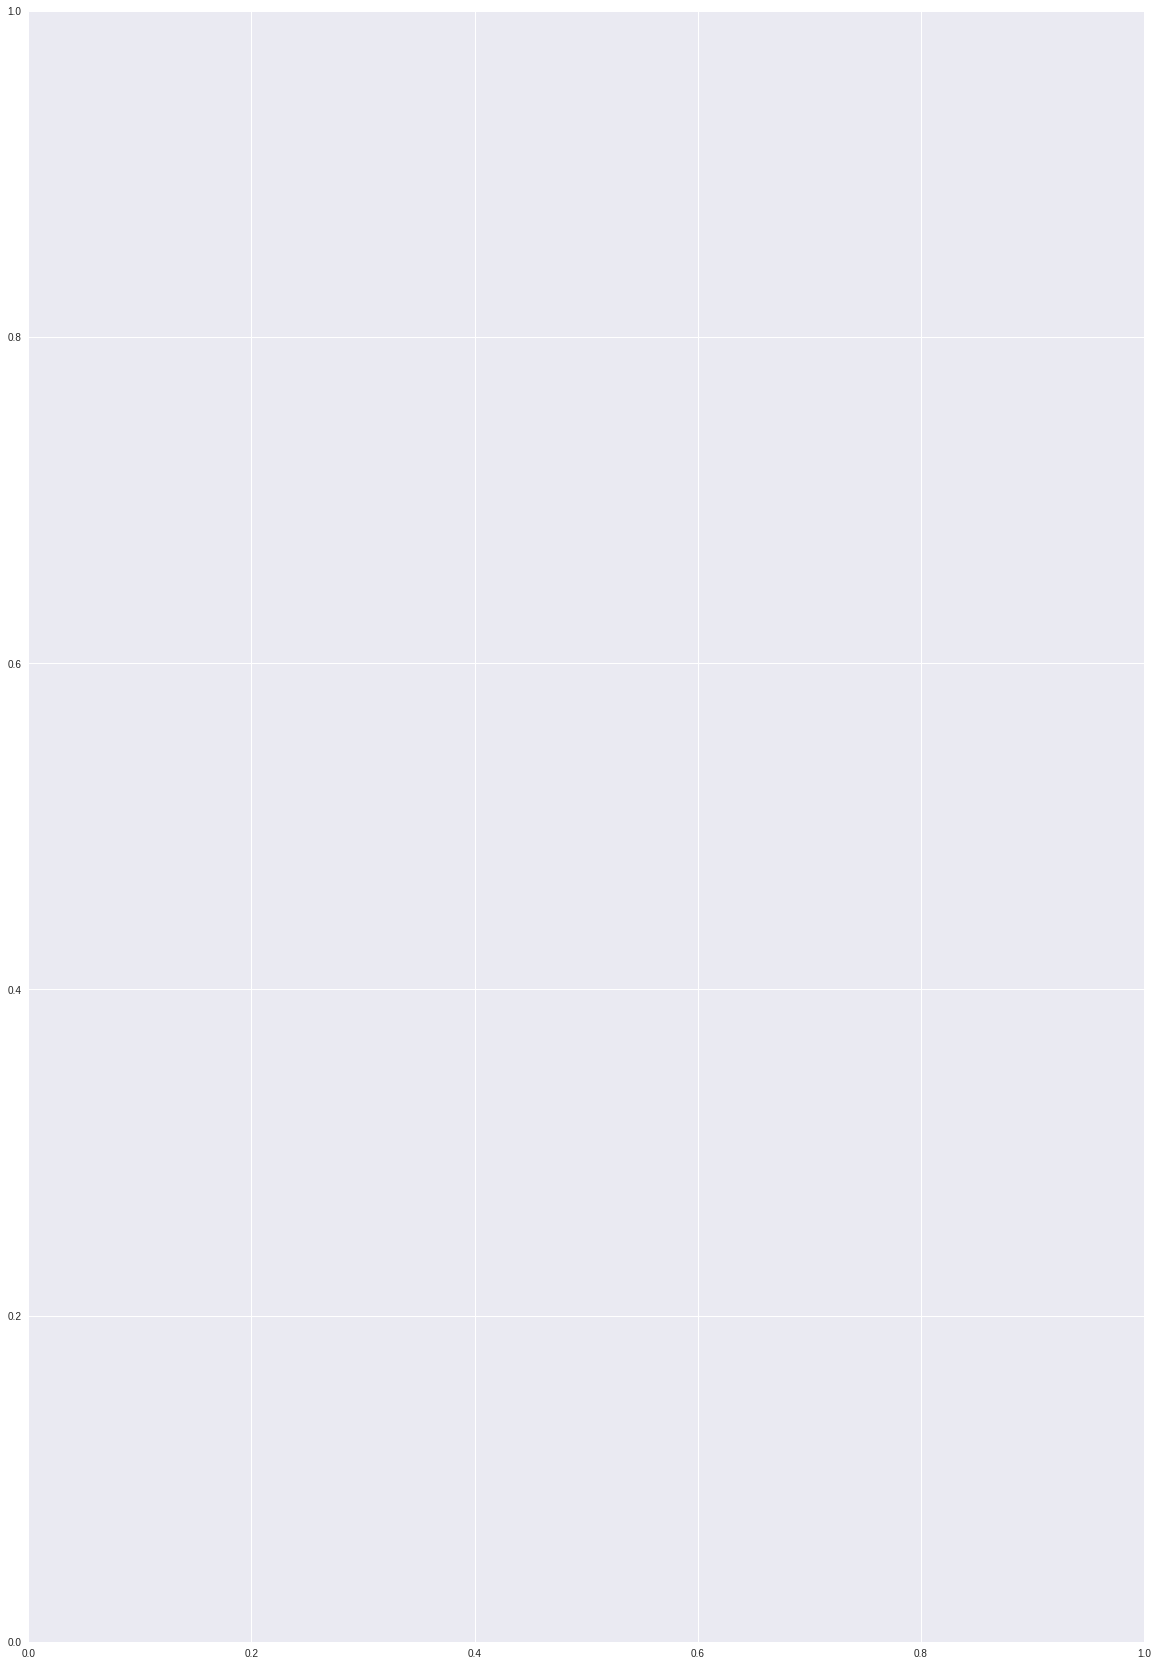

In [29]:
plt.subplots(figsize=(20,30))

In [30]:
sns.set_color_codes("pastel")

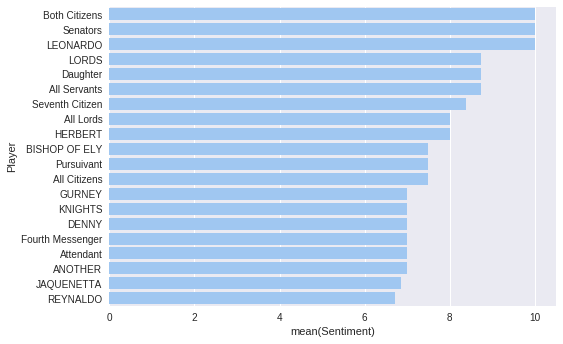

In [31]:
#top 10 sentiments
ax = sns.barplot(x = 'Sentiment' , y ='Player' , data = character_by_sentiment.head(20) , label = 'Sentiment' , color = 'b')

In [32]:
ax.set(xlabel ='Sentiments' , ylabel = 'Player')

In [33]:
fig =ax.get_figure()

In [34]:
fig.savefig('sentiment_top_20 .png')

In [35]:
plt.show()

(<matplotlib.figure.Figure at 0x7f1a953ef4e0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1a952dbc50>)

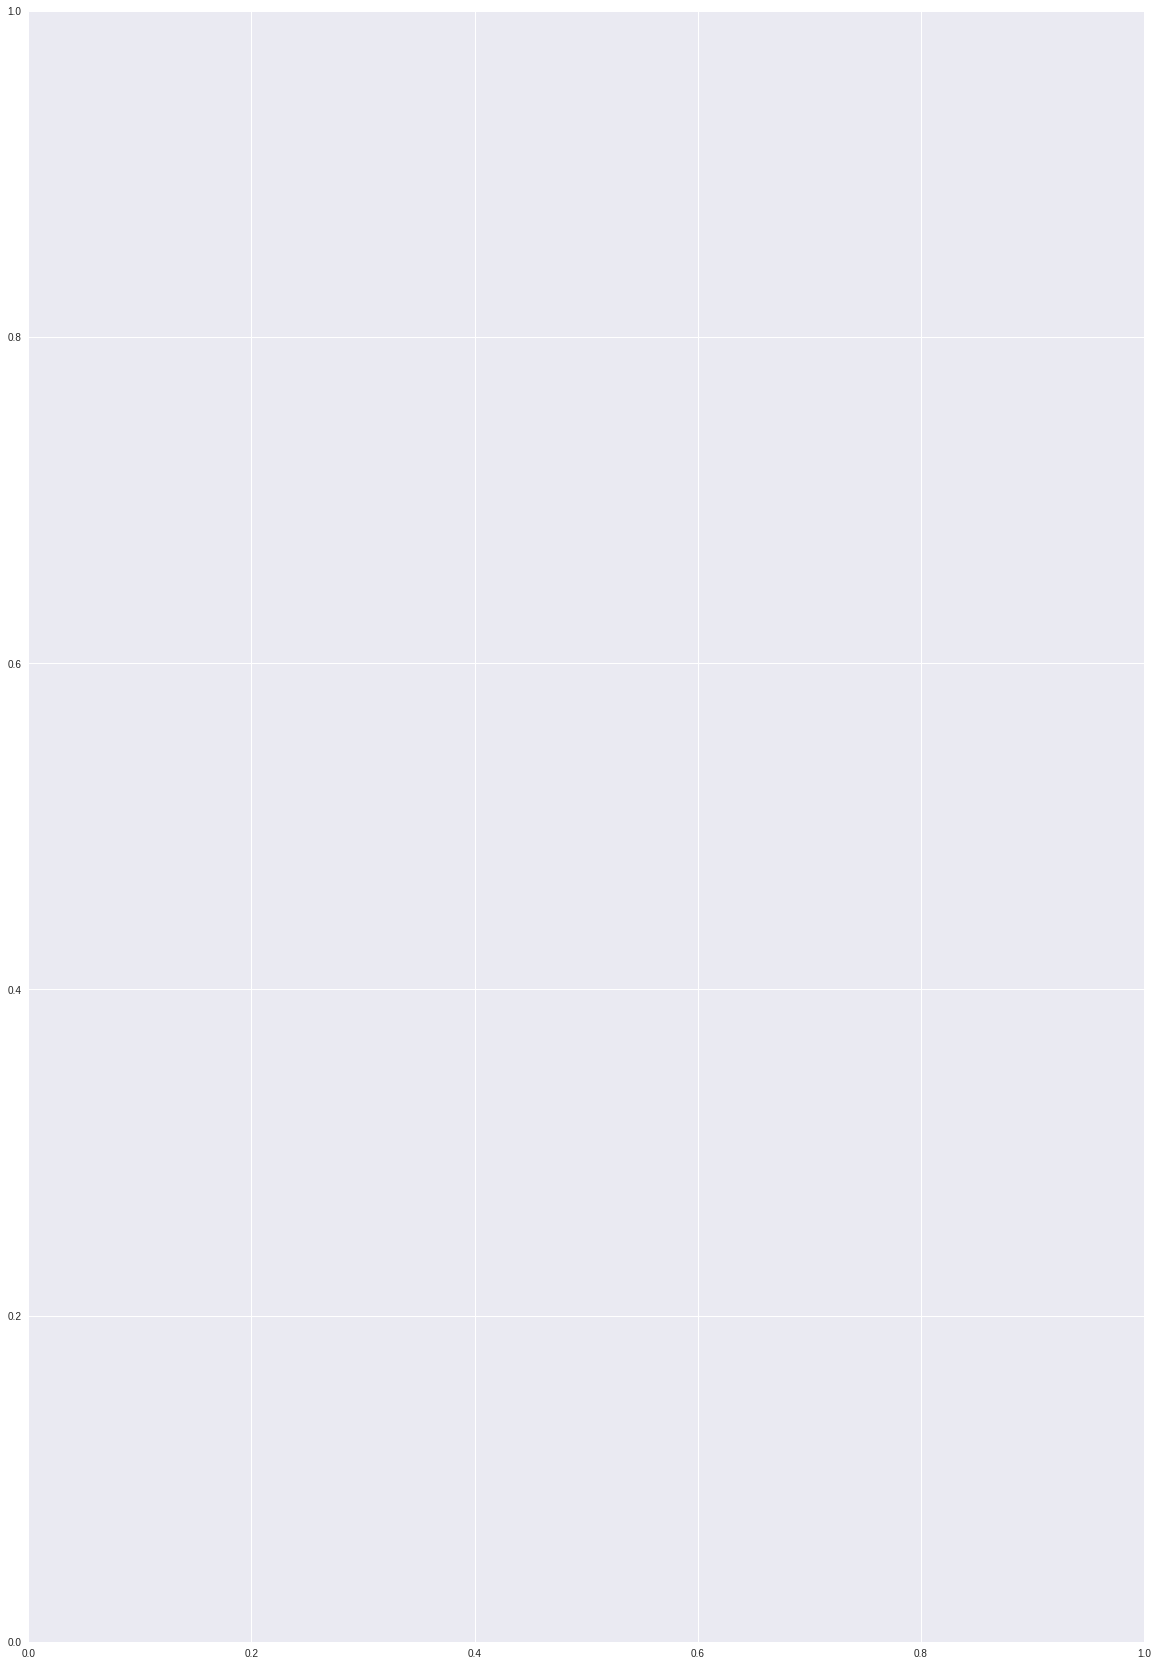

In [36]:
#last 20 sentiments
plt.subplots(figsize=(20,30))

In [37]:
sns.set_color_codes("pastel")

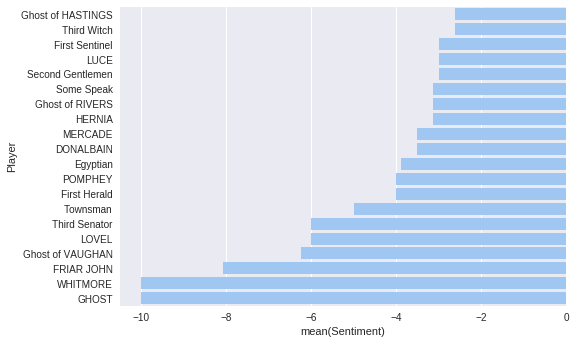

In [45]:
ax1 = sns.barplot(x = 'Sentiment' , y = 'Player' , data = character_by_sentiment.tail(20) , color='b')

In [46]:
ax1.set(xlabel = 'Sentiments', ylabel = 'Player' )

In [49]:
fig1 = ax1.get_figure()

In [50]:
fig1.savefig('sentiment_last_20.png')